___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
from google.colab import files
files.upload()

Saving bank_note_data.csv to bank_note_data.csv


{'bank_note_data.csv': b'"Image.Var","Image.Skew","Image.Curt","Entropy","Class"\n3.6216,8.6661,-2.8073,-0.44699,0\n4.5459,8.1674,-2.4586,-1.4621,0\n3.866,-2.6383,1.9242,0.10645,0\n3.4566,9.5228,-4.0112,-3.5944,0\n0.32924,-4.4552,4.5718,-0.9888,0\n4.3684,9.6718,-3.9606,-3.1625,0\n3.5912,3.0129,0.72888,0.56421,0\n2.0922,-6.81,8.4636,-0.60216,0\n3.2032,5.7588,-0.75345,-0.61251,0\n1.5356,9.1772,-2.2718,-0.73535,0\n1.2247,8.7779,-2.2135,-0.80647,0\n3.9899,-2.7066,2.3946,0.86291,0\n1.8993,7.6625,0.15394,-3.1108,0\n-1.5768,10.843,2.5462,-2.9362,0\n3.404,8.7261,-2.9915,-0.57242,0\n4.6765,-3.3895,3.4896,1.4771,0\n2.6719,3.0646,0.37158,0.58619,0\n0.80355,2.8473,4.3439,0.6017,0\n1.4479,-4.8794,8.3428,-2.1086,0\n5.2423,11.0272,-4.353,-4.1013,0\n5.7867,7.8902,-2.6196,-0.48708,0\n0.3292,-4.4552,4.5718,-0.9888,0\n3.9362,10.1622,-3.8235,-4.0172,0\n0.93584,8.8855,-1.6831,-1.6599,0\n4.4338,9.887,-4.6795,-3.7483,0\n0.7057,-5.4981,8.3368,-2.8715,0\n1.1432,-3.7413,5.5777,-0.63578,0\n-0.38214,8.3909,2.1624

In [0]:
import pandas as pd
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [0]:
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


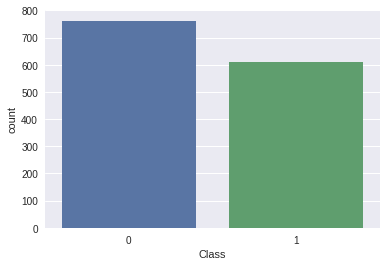

In [7]:
sns.countplot(x='Class',data=df)

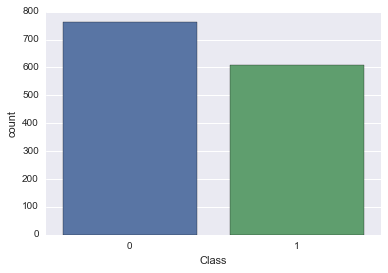

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

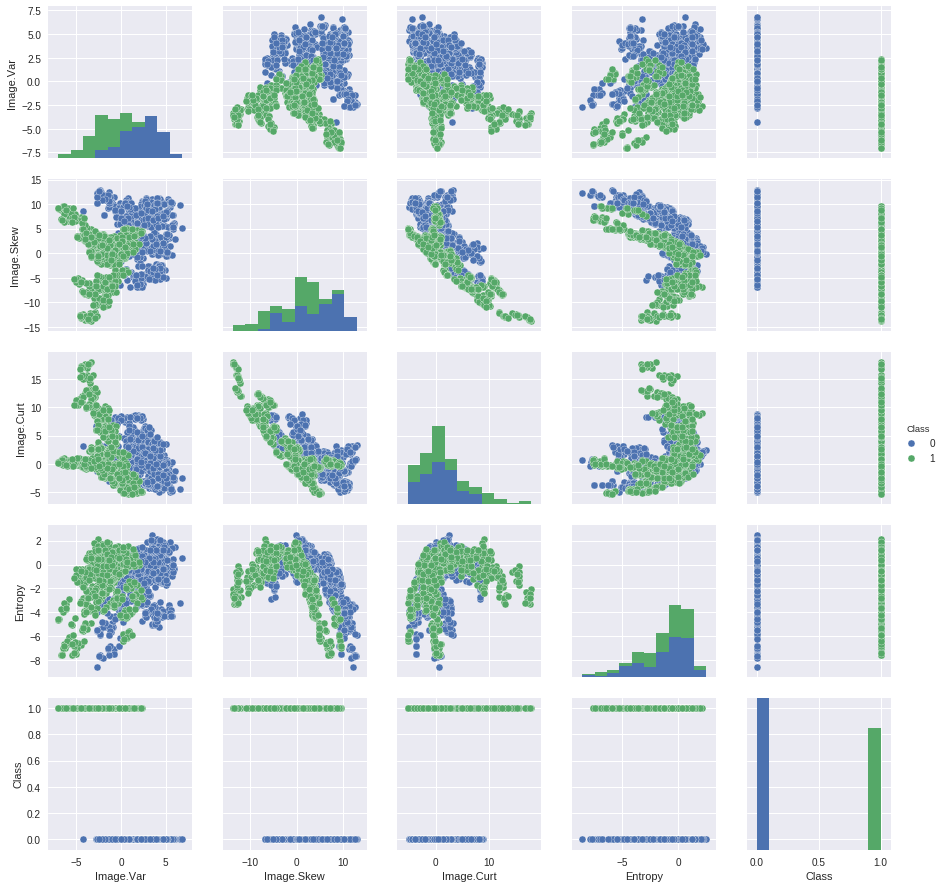

In [8]:
sns.pairplot(data=df,hue='Class')

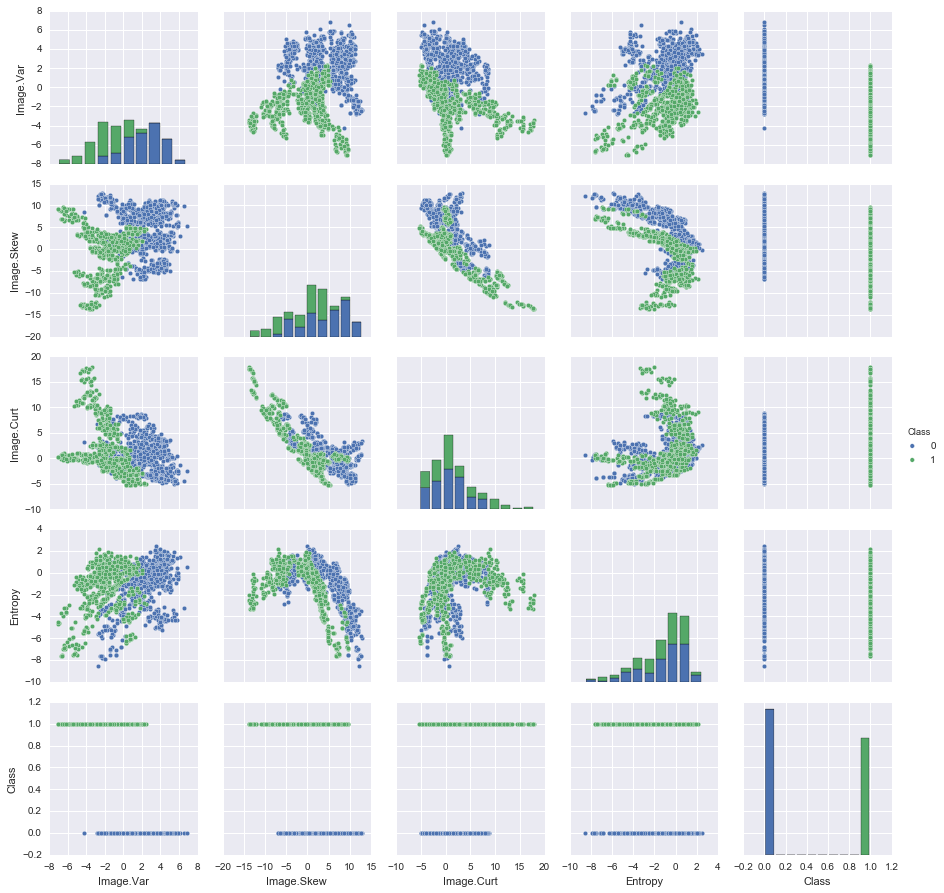

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [0]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [0]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [13]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [0]:
features = scaler.transform(df.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [0]:
features = pd.DataFrame(features,columns=df.columns[:-1])

In [19]:
features.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [0]:
from sklearn.cross_validation import train_test_split

In [0]:
X = features
y = df['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [0]:
X = X.as_matrix()
y = y.as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [0]:
import tensorflow as tf
from tensorflow.contrib.learn.python import learn

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [36]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier = learn.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feature_columns)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f52f25e03c8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_mode

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [37]:
classifier.fit(x=X_train,y=y_train,steps=200,batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for up

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f52ff1aea90>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f52f93e1488>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

/Users/marci/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


DNNClassifier()

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [48]:
y_pred = classifier.predict(X_test)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxdalpx2w/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
len(y_test)

412

In [0]:
y_pred = list(y_pred)

In [50]:
print (confusion_matrix(y_test,y_pred))
print ('\n')
print (classification_report(y_test,y_pred))

[[218   5]
 [  0 189]]


             precision    recall  f1-score   support

          0       1.00      0.98      0.99       223
          1       0.97      1.00      0.99       189

avg / total       0.99      0.99      0.99       412



[[237   0]
 [  1 174]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier = RandomForestClassifier()

In [53]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [56]:
print (classification_report(y_test,y_pred))
print ('\n')
print (confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       223
          1       0.98      0.99      0.99       189

avg / total       0.99      0.99      0.99       412



[[220   3]
 [  2 187]]


             precision    recall  f1-score   support

          0       1.00      0.98      0.99       237
          1       0.98      0.99      0.99       175

avg / total       0.99      0.99      0.99       412



[[233   4]
 [  1 174]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!